## Imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Load the data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

**Analyze the data**

We start by acquiring the training and testing datasets into Pandas DataFrames.<br> Note the feature names that are described in the datasets.

In [3]:
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
print(df_test.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [5]:
print("Shape of train data: ", df_train.shape)
print("-"*40)
print("Shape of test data: ", df_test.shape)

Shape of train data:  (891, 12)
----------------------------------------
Shape of test data:  (418, 11)


From above data, we can see that there are 891 entries and 12 features in train data.<br> While in test data, 418 entries and 11 features.('Survived' feature is excluded as it is target feature) 

**Preview the data**

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_train.info()
print("-"*50)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

### Numerical data, Categorical data and Mixed data

<strong>Categorical Data :</strong> These values classify the samples into sets of similar samples.<br>
<ul>
<li>Nominal(variables that have two or more categories, but which do not have an intrinsic order.)</li>
    <ol>
    <li>Cabin</li>
    <li>Embarked</li>
        <ul>
        <li>C(Cherbourg)</li>
        <li>Q(Queenstown)</li> 
        <li>S(Southampton)</li>
        </ul>
    </ol>
<li>Dichotomous(Nominal variable with only two categories)</li>
    <ol>
    <li>Sex</li>
        <ul>
            <li>Female</li>
            <li>Male</li>
        </ul>
    </ol>
<li>Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)</li>
    <ol>
    <li>Pclass (A proxy for socio-economic status (SES))</li>
        <ul>
        <li>1(Upper)</li>
        <li>2(Middle)</li> 
        <li>3(Lower)</li>
        </ul>
    </ol>
</ul>
<br>
<strong>Numerical Data :</strong> These are the values which can be discrete, continuous, or timeseries.<br>
<ul>
<li>Discrete</li>
    <ol>
    <li>Passenger ID(Unique identifing # for each passenger)</li>
    <li>SibSp</li>
    <li>Parch</li>
    <li>Survived (Our outcome or dependent variable)</li>
        <ul>
       <li>0</li>
       <li>1</li>
        </ul>
    </ol>
<li>Continous</li>
    <ol>
    <li>Age</li>
    <li>Fare</li>
    </ol>
</ul>
<br>
<strong>Mixed Data : </strong> Numerical, alphanumeric data within same feature.
<ul>
    <li>Ticket(mix of numeric and alphanumeric data types)</li>
    <li>Cabin(alphanumeric)</li>
</ul>

## Missing values

In [9]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and percentage of 
        total missing values"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [10]:
missing_percentage(df_train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [11]:
missing_percentage(df_test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


We see that in both `train`, and `test` dataset have missing values.<br>
Let's fill these missing values.

**Handle missing values**

In [12]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As maximum values in train set is S let's replace it with the null values

In [13]:
df_train.Embarked.fillna("S", inplace=True)
df_train.Embarked.fillna("S", inplace=True)

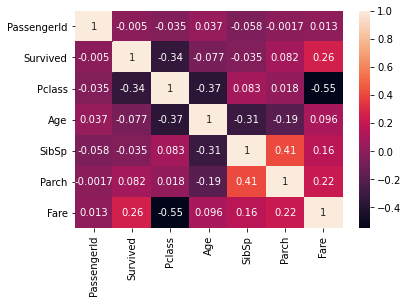

In [14]:
sns.heatmap(df_train.corr(), annot=True)

Pclass and age, as they had max relation so we are going to replace missing age values with median age calculated per class.

In [15]:
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby("Pclass").Age.transform('median')

df_test.loc[df_test.Age.isnull(), 'Age'] = df_test.groupby("Pclass").Age.transform('median')

Also, correlation between Fare and Pclass is the highest correlation in absolute numbers for 'Fare', so we'll use Pclass again to impute the missing values!

In [16]:
df_train['Fare']  = df_train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
df_test['Fare']  = df_test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [17]:
df_train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
D              3
              ..
C99            1
C90            1
C50            1
D11            1
D47            1
Name: Cabin, Length: 147, dtype: int64

So many different values let's place missing values with U as "Unknown".

In [18]:
df_train['Cabin'] = df_train['Cabin'].fillna('U')
df_test['Cabin'] = df_test['Cabin'].fillna('U')

In [19]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Visualization and Feature Relations

### `Gender and Survived`

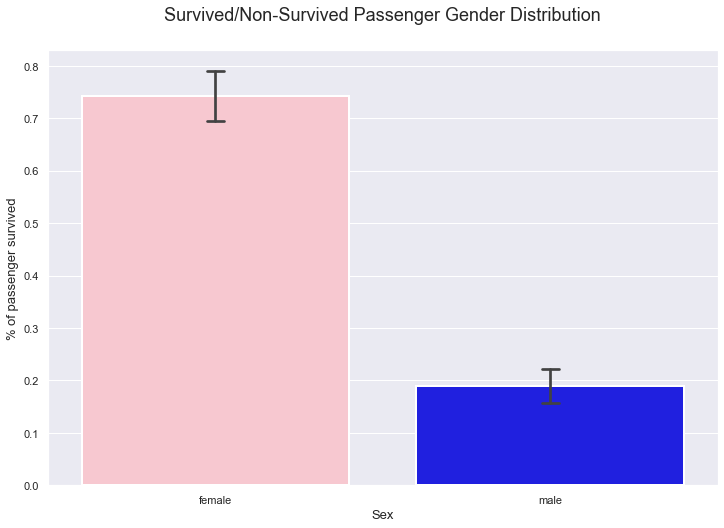

In [20]:
pal = {'male':"blue", 'female':"Pink"}
sns.set(style = "darkgrid")
plt.subplots(figsize = (12,8))
ax = sns.barplot(x = "Sex", y = "Survived", data = df_train, palette = pal, linewidth = 2, order = ['female','male'],
                 capsize = .05)

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 18,loc = 'center', pad = 30)
plt.ylabel("% of passenger survived", fontsize = 13)
plt.xlabel("Sex",fontsize = 13)
plt.show()

This bar plot above shows the distribution of female and male survived.<br>  This bar plot shows that `~74%` female passenger survived while only `~19%` male passenger survived.

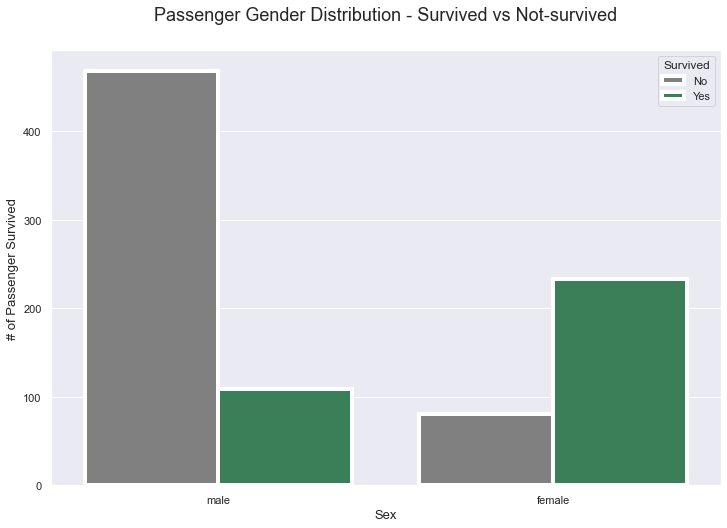

In [21]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (12,8))
ax = sns.countplot(x = "Sex", hue = "Survived", data = df_train, linewidth=4, palette = pal)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 18, pad = 30)
plt.xlabel("Sex", fontsize = 13);
plt.ylabel("# of Passenger Survived", fontsize = 13)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

Above count plot shows that among all the females `~230` survived and `~70` did not survive.<br>
While among male passengers `~110` survived and `~480` did not survive.

From above plots we can conclude that female passengers have survived at a much better rate than male passengers.

### `Pclass and Survived`

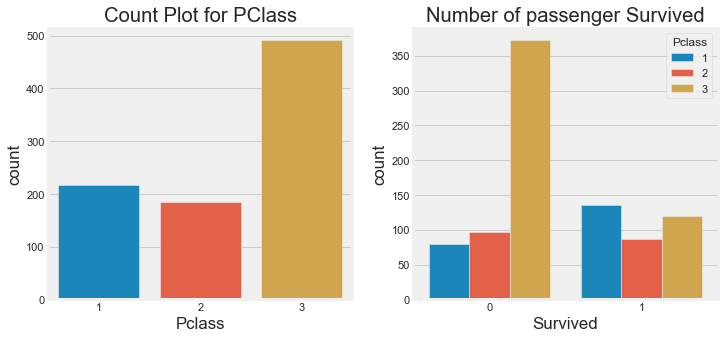

In [22]:
plt.figure(figsize = (12,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(df_train['Pclass'])
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x = "Survived", hue = "Pclass", data = df_train)
plt.title('Number of passenger Survived');

In [23]:
pclass1 = df_train[df_train.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = df_train[df_train.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = df_train[df_train.Pclass == 3]['Survived'].value_counts(normalize=True).values[1]*100

print("Lets look at some satistical data!\n")
print("Pclaas-1: {:.1f}% People Survived".format(pclass1))
print("Pclaas-2: {:.1f}% People Survived".format(pclass2))
print("Pclaas-3: {:.1f}% People Survived".format(pclass3))

Lets look at some satistical data!

Pclaas-1: 63.0% People Survived
Pclaas-2: 47.3% People Survived
Pclaas-3: 24.2% People Survived


It looks like<br>
63% first class passenger survived titanic tragedy, while<br>
 around 48% second class and<br>
only 24% third class passenger survived.

### `Fare and Survived`

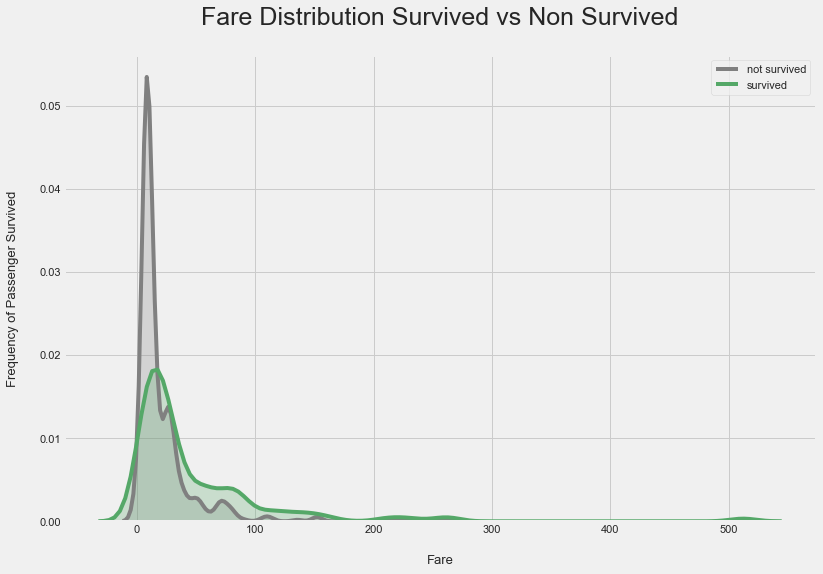

In [24]:
fig = plt.figure(figsize = (12,8))
ax = sns.kdeplot(df_train.loc[(df_train['Survived'] == 0),'Fare'] , color = 'gray', shade = True, label = 'not survived')
ax = sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Fare'] , color= 'g',shade = True, label = 'survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 30)
plt.ylabel("Frequency of Passenger Survived", fontsize = 13, labelpad = 20)
plt.xlabel("Fare", fontsize = 13, labelpad = 20)
plt.show()

The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive.<br>
Higher fare paying passengers had better survival.

### `Age and Survived`

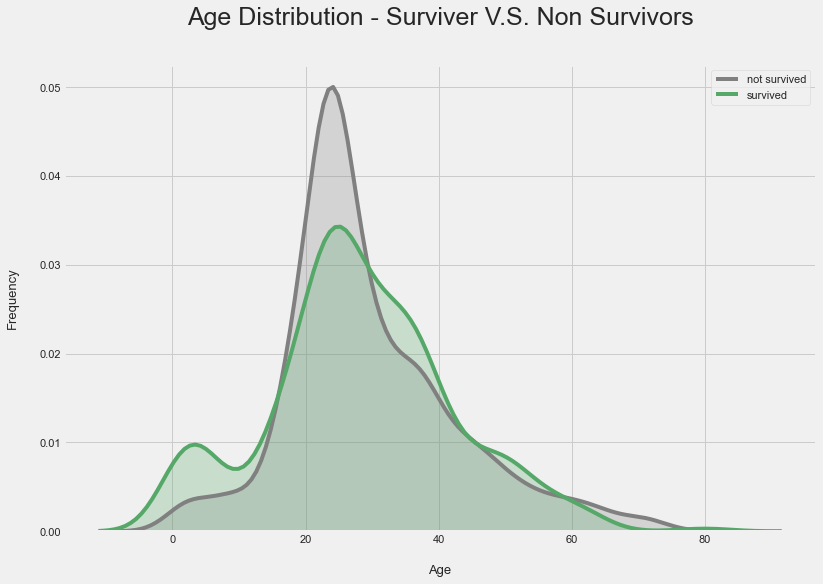

In [25]:
fig = plt.figure(figsize = (12,8),)
ax = sns.kdeplot(df_train.loc[(df_train['Survived'] == 0),'Age'] , color = 'gray',shade = True,label = 'not survived')
ax = sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Age'] , color = 'g',shade = True, label = 'survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 13, labelpad = 20)
plt.ylabel('Frequency', fontsize = 13, labelpad= 20)
plt.show()

There is nothing much to describe about above plot.

## Feature Engineering

**1. Sex**

In [26]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

Sex is categorical data so we can replace `male` to `0` and `female` to `1`.

In [27]:
df_train['Sex'][df_train['Sex'] == 'male'] = 0
df_train['Sex'][df_train['Sex'] == 'female'] = 1

df_test['Sex'][df_test['Sex'] == 'male'] = 0
df_test['Sex'][df_test['Sex'] == 'female'] = 1

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

**2. Embarked**

In [28]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(df_train[['Embarked']]).toarray(), columns = ['S', 'C', 'Q'])
df_train = df_train.join(temp)
df_train.drop(columns='Embarked', inplace = True)

temp = pd.DataFrame(encoder.transform(df_test[['Embarked']]).toarray(), columns = ['S', 'C', 'Q'])
df_test = df_test.join(temp)
df_test.drop(columns = 'Embarked', inplace = True)

**3. Cabin**

In [30]:
import re

df_train['Cabin'] = df_train['Cabin'].map(lambda x : re.compile("([a-zA-Z])").search(x).group())
df_test['Cabin'] = df_test['Cabin'].map(lambda x : re.compile("([a-zA-Z])").search(x).group())

In [31]:
df_train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [32]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
df_train['Cabin'] = df_train['Cabin'].map(cabin_category)
df_test['Cabin'] = df_test['Cabin'].map(cabin_category)

**4. Name**

In [33]:
df_train['Name'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df_test['Name'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [34]:
df_train['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [35]:
df_train.rename(columns = {'Name' : 'Title'}, inplace = True)
df_train['Title'] = df_train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
df_test.rename(columns = {'Name' : 'Title'}, inplace = True)
df_test['Title'] = df_test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [36]:
df_train['Title'].value_counts(normalize = True) * 100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

It's better to convert it into numerical data.

In [37]:
df_train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [38]:
title_category = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Other':5}
df_train['Title'] = df_train['Title'].map(title_category)
df_test['Title'] = df_test['Title'].map(title_category)

In [39]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Title', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Q'],
      dtype='object')

**5. family_size**

Creating a new feature called `family_size`.

We know that Sibsp is the number of siblings / spouses aboard the Titanic, and Parch is the number of parents / children aboard the Titanic.<br>We can say that, it is the size of each family aboard!

In [40]:
df_train['family_size'] = df_train.SibSp + df_train.Parch + 1
df_test['family_size'] = df_test.SibSp + df_test.Parch + 1

Drop redundant features

In [41]:
PassengerID = df_test['PassengerId']

In [42]:
df_train = df_train.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket'], axis = 1)
df_test = df_test.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket'], axis = 1)

In [43]:
df_train.sample(6)

,Survived,Pclass,Title,Sex,Age,Fare,Cabin,S,C,Q,family_size
636,0,3,1,0,32.0,7.925,9,0.0,0.0,1.0,1
442,0,3,1,0,25.0,7.775,9,0.0,0.0,1.0,2
35,0,1,1,0,42.0,52.000,9,0.0,0.0,1.0,2
579,1,3,1,0,32.0,7.925,9,0.0,0.0,1.0,1
41,0,2,2,1,27.0,21.000,9,0.0,0.0,1.0,2
441,0,3,1,0,20.0,9.500,9,0.0,0.0,1.0,1


## Model, predict and solve

In [44]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']
X_test = df_test.copy()

In [45]:
print("Train data: ", X_train.shape)
print('-'*20)
print("Test data: ", X_test.shape)

Train data:  (891, 10)
--------------------
Test data:  (418, 10)


### Feature Scaling

Let's Scale our data

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.fit_transform(X_test)

### Modeling the Data

#### LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, C=50)
# Train the model using the training sets
logreg.fit(X_train, y_train)

y_pred_logr = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.14

In [48]:
# Re-train model using scaled data 

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_sc, y_train)

acc_log_sc = round(logreg.score(X_train_sc, y_train) * 100, 2)
acc_log_sc

81.03

#### KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
# Train the model using the training sets
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

81.71

In [50]:
# Re-train model using scaled data 

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_sc, y_train)

acc_knn_sc = round(knn.score(X_train_sc, y_train) * 100, 2)
acc_knn_sc

86.08

#### Support Vector Machine(SVM)

In [51]:
from sklearn.svm import SVC

svc = SVC(gamma=0.1, C = 50)
# Train the model using the training sets
svc.fit(X_train, y_train)

Y_pred_svc = svc.predict(X_test)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

96.75

In [52]:
# Re-train model using scaled data 

svc = SVC(C = 50)
svc.fit(X_train_sc, y_train)

acc_svc_sc = round(svc.score(X_train_sc, y_train) * 100, 2)
acc_svc_sc

88.33

#### LinearSVC

In [53]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
# Train the model using the training sets
linear_svc.fit(X_train, y_train)

Y_pred_linear_svc = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.57

In [54]:
# Re-train model using scaled data 

linear_svc = LinearSVC(C = 50)
linear_svc.fit(X_train_sc, y_train)

acc_linear_svc_sc = round(linear_svc.score(X_train_sc, y_train) * 100, 2)
acc_linear_svc_sc

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.56

#### Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
# Train the model using the training sets
gaussian.fit(X_train, y_train)

Y_pred_gnb = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.0

In [56]:
# Re-train model using scaled data 

gaussian = GaussianNB()
gaussian.fit(X_train_sc, y_train)

acc_gaussian_sc = round(gaussian.score(X_train_sc, y_train) * 100, 2)
acc_gaussian_sc

78.0

#### Decision tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth = 3)
# Train the model using the training sets
decision_tree.fit(X_train, y_train)

Y_pred_dt = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

82.38

In [58]:
# Re-train model using scaled data 

decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train_sc, y_train)

acc_decision_tree_sc = round(decision_tree.score(X_train_sc, y_train) * 100, 2)
acc_decision_tree_sc

82.38

#### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 7, max_features = 'auto', \
                                       n_estimators = 100)
# Train the model using the training sets
random_forest.fit(X_train, y_train)

Y_pred_rf = random_forest.predict(X_test)

acc_random_forest_sc = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_sc

89.9

In [60]:
# Re-train model using scaled data 

random_forest = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 7, max_features = 'auto', \
                                       n_estimators = 100)
random_forest.fit(X_train_sc, y_train)

acc_random_forest = round(random_forest.score(X_train_sc, y_train) * 100, 2)
acc_random_forest

89.9

**Model Evaluation**

In [61]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,96.75
3,Random Forest,89.90
6,Decision Tree,82.38
1,KNN,81.71
2,Logistic Regression,81.14
5,Linear SVC,79.57
4,Naive Bayes,78.00


## Final submission

Choosing Support Vector Machines model for the instance,

In [62]:
submission = pd.DataFrame({
        "PassengerId": PassengerID,
        "Survived": Y_pred_svc
    })
submission.to_csv('submission.csv', index=False)